In [ ]:
# INF2178 Assignment 4
# Student Name: Songjia Liu
# Student Number: 1005137503

In [ ]:
# Data uploading

In [ ]:
# Import packages needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit

In [ ]:
# Load data file with the format of csv
from google.colab import drive
drive. mount('/drive',force_remount = True)
df = pd.read_csv('/drive/MyDrive/INF2178_A4_data.csv')

# Check the first 5 rows of our dataset
df.head(10)

Mounted at /drive


,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


In [ ]:
# Data cleaning

In [ ]:
# Select columns that are needed
df_clean = df[["Subject ID", "Group", "Visit", "nWBV", "ASF"]]
df_clean

,Subject ID,Group,Visit,nWBV,ASF
0,OAS2_0001,Nondemented,1,0.696,0.883
1,OAS2_0001,Nondemented,2,0.681,0.876
2,OAS2_0002,Demented,1,0.736,1.046
3,OAS2_0002,Demented,2,0.713,1.010
4,OAS2_0004,Nondemented,1,0.710,1.444
...,...,...,...,...,...
289,OAS2_0184,Demented,2,0.708,1.299
290,OAS2_0185,Demented,1,0.711,1.030
291,OAS2_0185,Demented,2,0.694,1.037
292,OAS2_0186,Nondemented,1,0.801,1.331


In [ ]:
#Show the general information of the dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  294 non-null    object 
 1   Group       294 non-null    object 
 2   Visit       294 non-null    int64  
 3   nWBV        294 non-null    float64
 4   ASF         294 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 11.6+ KB


In [ ]:
# Check whether there are missing values in dataset
null_counts = df_clean.isnull().sum()
null_counts
# We can see there is no null value

Subject ID    0
Group         0
Visit         0
nWBV          0
ASF           0
dtype: int64

In [ ]:
# Exploratory Data Analysis (EDA)

In [138]:
# Show the summany statistics of the
df_clean.describe()

,Visit,nWBV,ASF
count,294.000000,294.000000,294.000000
mean,1.489796,0.731381,1.203109
std,0.500748,0.037373,0.139365
min,1.000000,0.646000,0.876000
25%,1.000000,0.703000,1.118250
50%,1.000000,0.732000,1.201000
75%,2.000000,0.756000,1.302750
max,2.000000,0.837000,1.587000


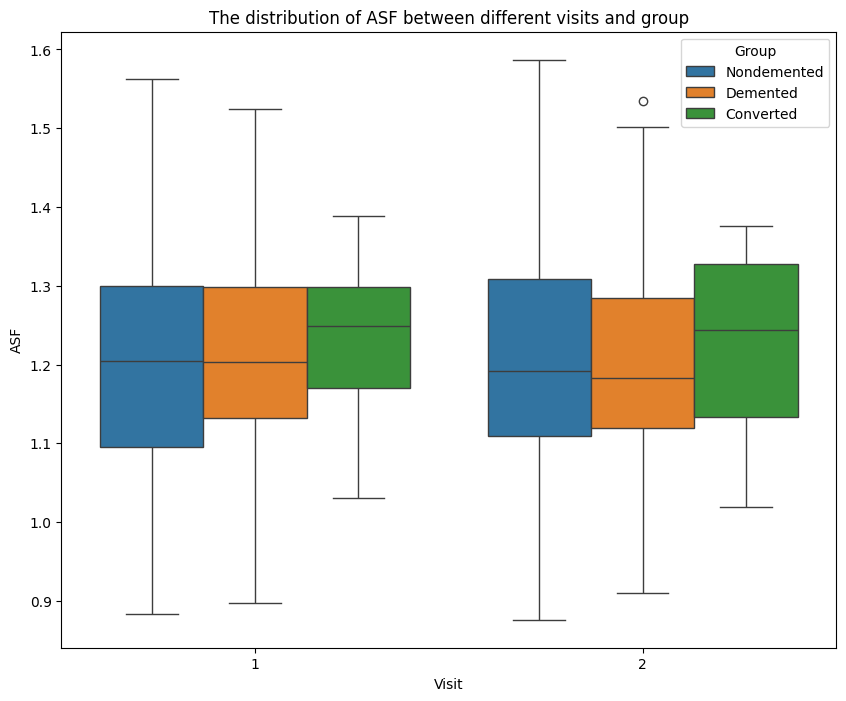

In [ ]:
# Create a boxplot that shows the distribution of Atlas Scaling Factor (ASF) between different visits and groups
plt.figure(figsize=(10, 8))
sns.boxplot(x='Visit', y='ASF', hue='Group', data=df_clean)
plt.title('The distribution of ASF between different visits and group')
plt.xlabel('Visit')
plt.ylabel('ASF')
plt.show()

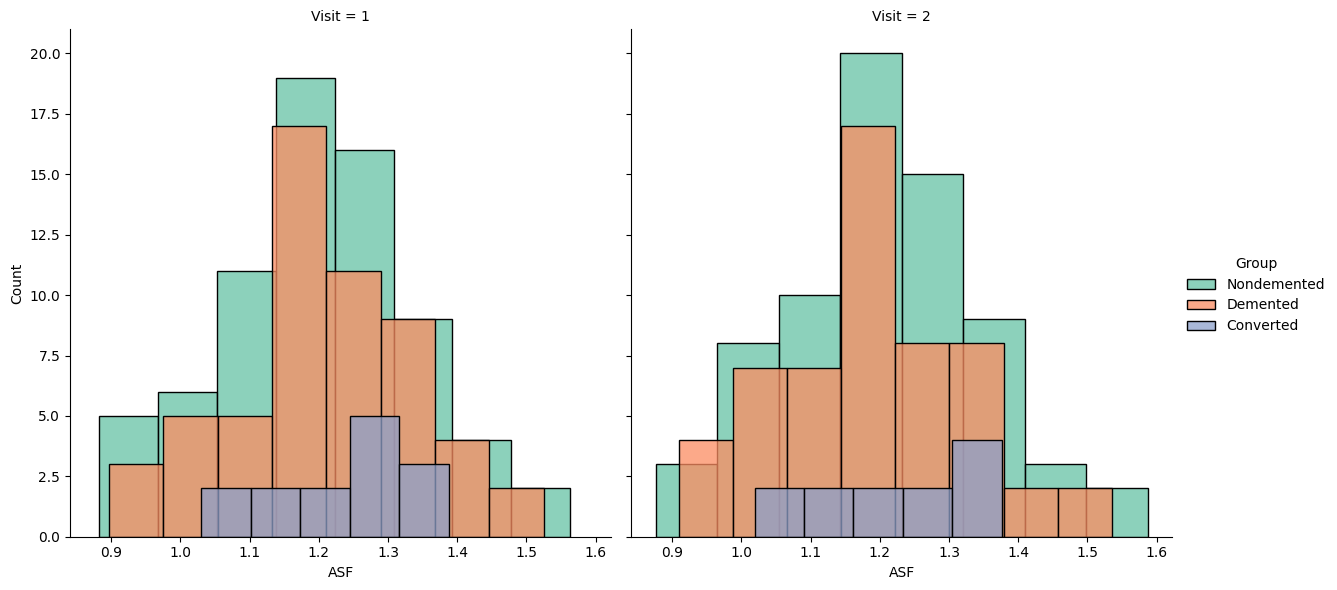

In [ ]:
# Creating histograms to compare the distribution of Atlas Scaling Factor (ASF) between visits and groups
plot = sns.FacetGrid(df_clean, col='Visit', hue='Group', palette='Set2', height=6)
plot.map(sns.histplot, 'ASF')
plot.add_legend()
plt.show()

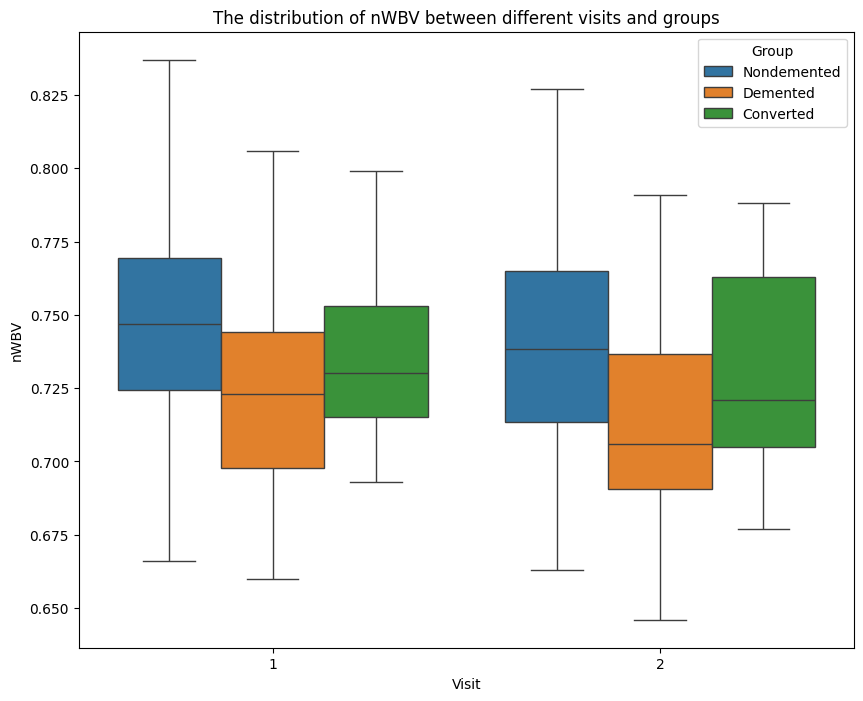

In [ ]:
# Create a boxplot that shows the distribution of Normalize Whole Brain Volume (nWBV) between different visits and groups
plt.figure(figsize=(10, 8))
sns.boxplot(x='Visit', y='nWBV', hue='Group', data=df_clean)
plt.title('The distribution of nWBV between different visits and groups')
plt.xlabel('Visit')
plt.ylabel('nWBV')
plt.show()

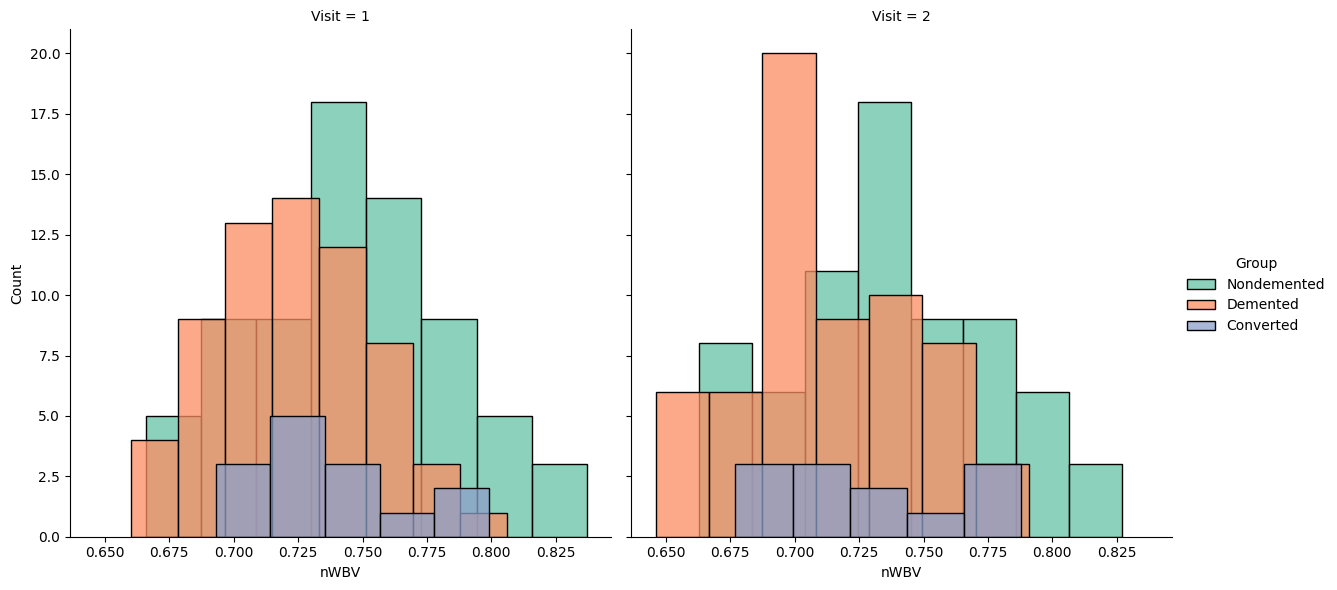

In [ ]:
# Creating histograms to compare the distribution of Normalize Whole Brain Volume (nWBV) between visits and groups
plot = sns.FacetGrid(df_clean, col='Visit', hue='Group', palette='Set2', height=6)
plot.map(sns.histplot, 'nWBV')
plot.add_legend()
plt.show()

In [ ]:
# Mixed effects ANOVA

In [ ]:
# Research question 1:
# How does the Atlas Scaling Factor (ASF) change over different visits and between groups (Demented, Nondemented, and Converted), and is there an interaction effect between visit number and group status on ASF changes?

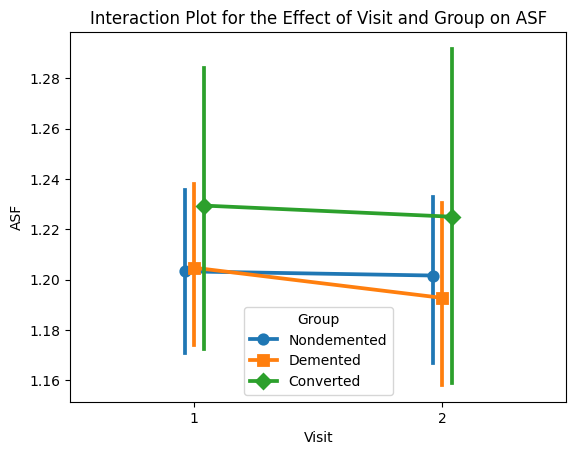

In [ ]:
# Create the interaction plot
sns.pointplot(data=df_clean,x='Visit',y='ASF',hue='Group',dodge=True,markers=['o','s','D'])
# Add the title and xy labels
plt.title('Interaction Plot for the Effect of Visit and Group on ASF')
plt.xlabel('Visit')
plt.ylabel('ASF')
plt.legend(title='Group')
# show the plot
plt.show()

In [ ]:
# Group by each group with visits time of observing ASF mean differences and standard deviations
df_clean.groupby(['Visit', 'Group'])['ASF'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    1.23  0.11
      Demented     1.20  0.14
      Nondemented  1.20  0.14
2     Converted    1.22  0.12
      Demented     1.19  0.14
      Nondemented  1.20  0.15

In [ ]:
# Import stuff and pacages for conducting Mixed-design Anova
%pip install dfply
from dfply import *
%pip install pingouin
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import scipy.stats as stats
import pingouin as pg
from statsmodels.regression.mixed_linear_model import MixedLM
from scipy.stats import shapiro,levene,bartlett

In [140]:
# Compute the two-way mixed-design ANOVA
pg.mixed_anova(dv='ASF', within='Visit', between='Group', subject='Subject ID', data=df_clean)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.018402,2,141,0.009201,0.233695,0.791909,0.003304,NaN
1,Visit,0.003160,1,141,0.003160,8.754326,0.003624,0.058458,1.0
2,Interaction,0.000742,2,141,0.000371,1.027595,0.360531,0.014366,NaN


In [ ]:
# Conduct post-hoc test for mixed-design ANOVA
pg.pairwise_tests(dv='ASF',within='Visit',between='Group',subject='Subject ID',data=df_clean)

,Contrast,Visit,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit,-,1,2,True,True,2.958200,143.000000,two-sided,0.003622,5.99,0.047130
1,Group,-,Converted,Demented,False,True,0.780541,17.188419,two-sided,0.445690,0.392,0.221009
2,Group,-,Converted,Nondemented,False,True,0.638894,17.092818,two-sided,0.531361,0.36,0.172228
3,Group,-,Demented,Nondemented,False,True,-0.224171,129.353952,two-sided,0.822978,0.191,-0.038747
4,Visit * Group,1,Converted,Demented,False,True,0.737434,17.479954,two-sided,0.470642,0.382,0.205803
5,Visit * Group,1,Converted,Nondemented,False,True,0.683559,17.215987,two-sided,0.503351,0.368,0.183073
6,Visit * Group,1,Demented,Nondemented,False,True,-0.088309,129.113713,two-sided,0.929768,0.187,-0.015275
7,Visit * Group,2,Converted,Demented,False,True,0.819050,17.098661,two-sided,0.424027,0.402,0.232985
8,Visit * Group,2,Converted,Nondemented,False,True,0.594380,17.015881,two-sided,0.560078,0.352,0.160893
9,Visit * Group,2,Demented,Nondemented,False,True,-0.355941,129.370435,two-sided,0.722464,0.198,-0.061519


In [ ]:
# Checking assumptions
# Mauchly's test of spericity
pg.sphericity(data=df_clean, dv='ASF', subject='Subject ID', within='Visit')[-1]

1.0

In [143]:
# Test for Normality
pg.normality(data=df_clean, dv='ASF', group='Visit')

,W,pval,normal
Visit,,,
1,0.992676,0.641561,True
2,0.992931,0.698794,True


In [142]:
# Variances are homogenous
# Levene's test if the sample data is not normal distribution
pg.homoscedasticity(data=df_clean, dv='ASF', group='Visit')


,W,pval,equal_var
levene,0.125435,0.723468,True


In [ ]:
# Research Question 2:
# How does the Normalized Whole Brain Volume (nWBV) change over different visits between groups (Demented, Nondemented and converted), and is there an interaction effect between visit number and group status on nWBV changes?

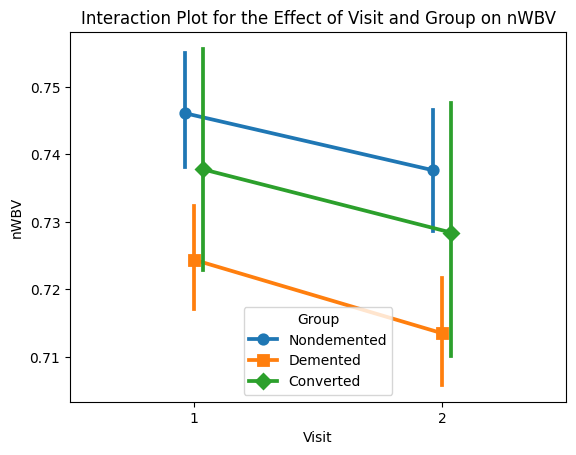

In [ ]:
# Create the interaction plot
sns.pointplot(data=df_clean,x='Visit',y='nWBV',hue='Group',dodge=True,markers=['o','s','D'])
# Add the title and xy labels
plt.title('Interaction Plot for the Effect of Visit and Group on nWBV')
plt.xlabel('Visit')
plt.ylabel('nWBV')
plt.legend(title='Group')
# show the plot
plt.show()

In [ ]:
# Group by each group with visit number of observing nWBV mean differences and standard deviations
df_clean.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.03
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

In [146]:
# Compute the two-way mixed-design ANOVA
pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df_clean)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.033640,2,141,0.016820,6.712381,1.642113e-03,0.086934,NaN
1,Visit,0.006508,1,141,0.006508,94.251225,2.226896e-17,0.400641,1.0
2,Interaction,0.000212,2,141,0.000106,1.533508,2.193542e-01,0.021289,NaN


In [ ]:
# Conduct post-hoc test for mixed-design ANOVA
pg.pairwise_tests(dv='nWBV',within='Visit',between='Group',subject='Subject ID',data=df_clean)

,Contrast,Visit,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit,-,1,2,True,True,9.672288,143.000000,two-sided,2.460952e-17,2.258e+14,0.254531
1,Group,-,Converted,Demented,False,True,1.401412,14.675514,two-sided,1.818838e-01,0.668,0.469178
2,Group,-,Converted,Nondemented,False,True,-0.647523,15.832312,two-sided,5.265725e-01,0.361,-0.188440
3,Group,-,Demented,Nondemented,False,True,-3.690388,129.436150,two-sided,3.286561e-04,75.094,-0.632627
4,Visit * Group,1,Converted,Demented,False,True,1.444264,14.626435,two-sided,1.697441e-01,0.701,0.485638
5,Visit * Group,1,Converted,Nondemented,False,True,-0.465015,15.994963,two-sided,6.481884e-01,0.333,-0.133840
6,Visit * Group,1,Demented,Nondemented,False,True,-3.413189,129.011431,two-sided,8.583121e-04,32.393,-0.584356
7,Visit * Group,2,Converted,Demented,False,True,1.324162,14.879390,two-sided,2.054311e-01,0.615,0.435617
8,Visit * Group,2,Converted,Nondemented,False,True,-0.811482,15.614690,two-sided,4.292861e-01,0.397,-0.239827
9,Visit * Group,2,Demented,Nondemented,False,True,-3.856310,129.952323,two-sided,1.802558e-04,127.576,-0.662930


In [ ]:
# Checking assumptions
# Mauchly's test of spericity
pg.sphericity(data=df_clean, dv='nWBV', subject='Subject ID', within='Visit')[-1]

1.0

In [ ]:
# Test for Normality
pg.normality(data=df_clean, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
1,0.990075,0.372060,True
2,0.989654,0.366703,True


In [ ]:
# Variances are homogenous
# Levene's test if the sample data is not normal distribution
pg.homoscedasticity(data=df_clean, dv='nWBV', group='Visit')

,W,pval,equal_var
levene,0.504444,0.478121,True


In [ ]:
# Statistical Power for t-test

In [ ]:
from math import sqrt
from statsmodels.stats.power import TTestIndPower

# List parameters required by the instruction
effect_size = 0.7 # Large effect size
power = 0.91
alpha = 0.05

obj = TTestIndPower()
# Calculate the sample size
n = obj.solve_power(effect_size=effect_size,alpha=alpha,power=power,ratio=1,alternative='two-sided')

# Print the result
print('Sample Size Needed in Each Group: {:.3f}'.format(n))

Sample Size Needed in Each Group: 45.451


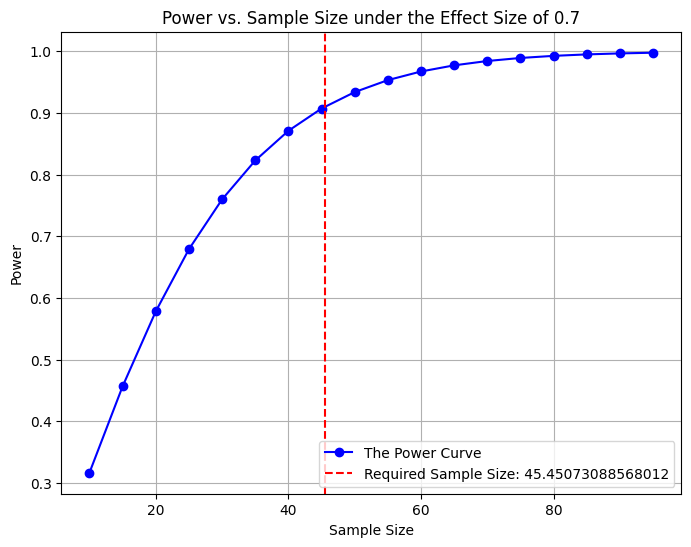

In [ ]:
# reate a range of sample sizes for a finer curve
spl_size = np.arange(10,100,5)
powers = obj.solve_power(effect_size=0.7,nobs1=spl_size,alpha=alpha,power=None,ratio=1.0,alternative='two-sided')

# Plot the power curve
# Set the size of figure
plt.figure(figsize=(8,6))
plt.plot(spl_size,powers,'-o',color='blue',label='The Power Curve')
plt.axvline(x=n,color='red',linestyle='--',label=f'Required Sample Size: {n}')
# Add the title and xy labels
plt.title('Power vs. Sample Size under the Effect Size of 0.7')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.grid(True)
plt.legend()
# Show the result
plt.show()